# Association Rule Learning

## 1. Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

## 2. Load the Data:

In [2]:
basket_data = pd.read_csv("basket.csv")
grocery_data = pd.read_csv("Groceries data.csv")

In [3]:
basket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


In [4]:
grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [5]:
basket_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
grocery_data.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


for our task I will use the basket dataset only.

## 3. Preprocessing:

### 3.1 Convert dataset to a transactional format (list of lists):

In [7]:
transactions = []
for index, row in basket_data.iterrows():
    transactions.append([item for item in row if pd.notna(item)])

### 3.2 Create one-hot encoded DataFrame:

In [8]:
items = list(set(item for sublist in transactions for item in sublist))

In [9]:
items[:5]

['abrasive cleaner', 'softener', 'pork', 'rum', 'frozen chicken']

In [10]:
one_hot_encoded_data = pd.DataFrame(0, index=np.arange(len(transactions)), columns=items, dtype=bool)

In [11]:
for idx, transaction in enumerate(transactions):
    one_hot_encoded_data.loc[idx, one_hot_encoded_data.columns.isin(transaction)] = True

In [12]:
one_hot_encoded_data.head()

,abrasive cleaner,softener,pork,rum,frozen chicken,beef,whipped/sour cream,onions,bottled water,frozen vegetables,...,sliced cheese,other vegetables,photo/film,mayonnaise,cream cheese,liqueur,sausage,female sanitary products,shopping bags,pastry
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Now every row represent a transaction and a binary value to indicate if the item was in this transaction or not.

## 4. Implement Apriori Algorithm:

In [13]:
min_support = 0.001

In [14]:
frequent_itemsets_apriori = apriori(one_hot_encoded_data, min_support=min_support, use_colnames=True)

In [15]:
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)

In [16]:
rules_apriori.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(margarine),(pork),0.032213,0.037091,0.001337,0.041494,1.118687,1.0,0.000142,1.004593,0.109626,0.019666,0.004572,0.038765
1,(pork),(margarine),0.037091,0.032213,0.001337,0.036036,1.118687,1.0,0.000142,1.003966,0.110182,0.019666,0.003951,0.038765
2,(brown bread),(pork),0.037626,0.037091,0.001671,0.044405,1.197174,1.0,0.000275,1.007653,0.171139,0.022873,0.007595,0.044725
3,(pork),(brown bread),0.037091,0.037626,0.001671,0.045045,1.197174,1.0,0.000275,1.007769,0.171044,0.022873,0.007709,0.044725
4,(frozen vegetables),(beef),0.028002,0.033950,0.001270,0.045346,1.335656,1.0,0.000319,1.011937,0.258544,0.020925,0.011796,0.041374


In [17]:
rules_apriori.describe()

,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.0,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.046970,0.046970,0.001612,0.055186,1.186579,1.0,2.042557e-04,1.009150,0.146362,0.017747,0.008865,0.055186
std,0.035328,0.035328,0.000881,0.042429,0.191060,0.0,1.798316e-04,0.014880,0.117730,0.006297,0.013779,0.017788
min,0.005347,0.005347,0.001002,0.006771,1.000136,1.0,5.091755e-07,1.000005,0.000141,0.006568,0.000005,0.033252
25%,0.021102,0.021102,0.001136,0.024330,1.051529,1.0,6.978719e-05,1.001675,0.052238,0.013888,0.001672,0.041625
50%,0.037359,0.037359,0.001370,0.041638,1.122790,1.0,1.498740e-04,1.004329,0.115819,0.016854,0.004311,0.049829
75%,0.060349,0.060349,0.001671,0.074008,1.253237,1.0,2.797830e-04,1.010030,0.214641,0.020942,0.009931,0.066191
max,0.157923,0.157923,0.005948,0.255814,2.182917,1.0,9.078510e-04,1.131541,0.576701,0.040913,0.116250,0.132562


## 5. Apply FP-Growth Algorithm:

In [18]:
frequent_itemsets_fpgrowth = fpgrowth(one_hot_encoded_data, min_support=min_support, use_colnames=True)

In [19]:
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)

In [20]:
rules_fpgrowth.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(sausage),(pastry),0.060349,0.051728,0.003208,0.053156,1.027617,1.0,0.000086,1.001509,0.028601,0.029466,0.001506,0.057586
1,(pastry),(sausage),0.051728,0.060349,0.003208,0.062016,1.027617,1.0,0.000086,1.001777,0.028341,0.029466,0.001774,0.057586
2,(sausage),(salty snack),0.060349,0.018780,0.001136,0.018826,1.002475,1.0,0.000003,1.000047,0.002627,0.014567,0.000047,0.039662
3,(salty snack),(sausage),0.018780,0.060349,0.001136,0.060498,1.002475,1.0,0.000003,1.000159,0.002516,0.014567,0.000159,0.039662
4,(salty snack),(canned beer),0.018780,0.046916,0.001002,0.053381,1.137802,1.0,0.000121,1.006830,0.123430,0.015496,0.006783,0.037374


In [21]:
rules_fpgrowth.describe()

,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.0,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.046970,0.046970,0.001612,0.055186,1.186579,1.0,2.042557e-04,1.009150,0.146362,0.017747,0.008865,0.055186
std,0.035328,0.035328,0.000881,0.042429,0.191060,0.0,1.798316e-04,0.014880,0.117730,0.006297,0.013779,0.017788
min,0.005347,0.005347,0.001002,0.006771,1.000136,1.0,5.091755e-07,1.000005,0.000141,0.006568,0.000005,0.033252
25%,0.021102,0.021102,0.001136,0.024330,1.051529,1.0,6.978719e-05,1.001675,0.052238,0.013888,0.001672,0.041625
50%,0.037359,0.037359,0.001370,0.041638,1.122790,1.0,1.498740e-04,1.004329,0.115819,0.016854,0.004311,0.049829
75%,0.060349,0.060349,0.001671,0.074008,1.253237,1.0,2.797830e-04,1.010030,0.214641,0.020942,0.009931,0.066191
max,0.157923,0.157923,0.005948,0.255814,2.182917,1.0,9.078510e-04,1.131541,0.576701,0.040913,0.116250,0.132562


## 6. Save results to an Excel file:

In [22]:
output_file = "Association_Rule_Evaluation.xlsx"
with pd.ExcelWriter(output_file) as writer:
    rules_apriori.to_excel(writer, sheet_name="Apriori Rules", index=False)
    rules_fpgrowth.to_excel(writer, sheet_name="FP-Growth Rules", index=False)

print(f"Results saved to {output_file}")

Results saved to Association_Rule_Evaluation.xlsx


## 7. Compare Rules:

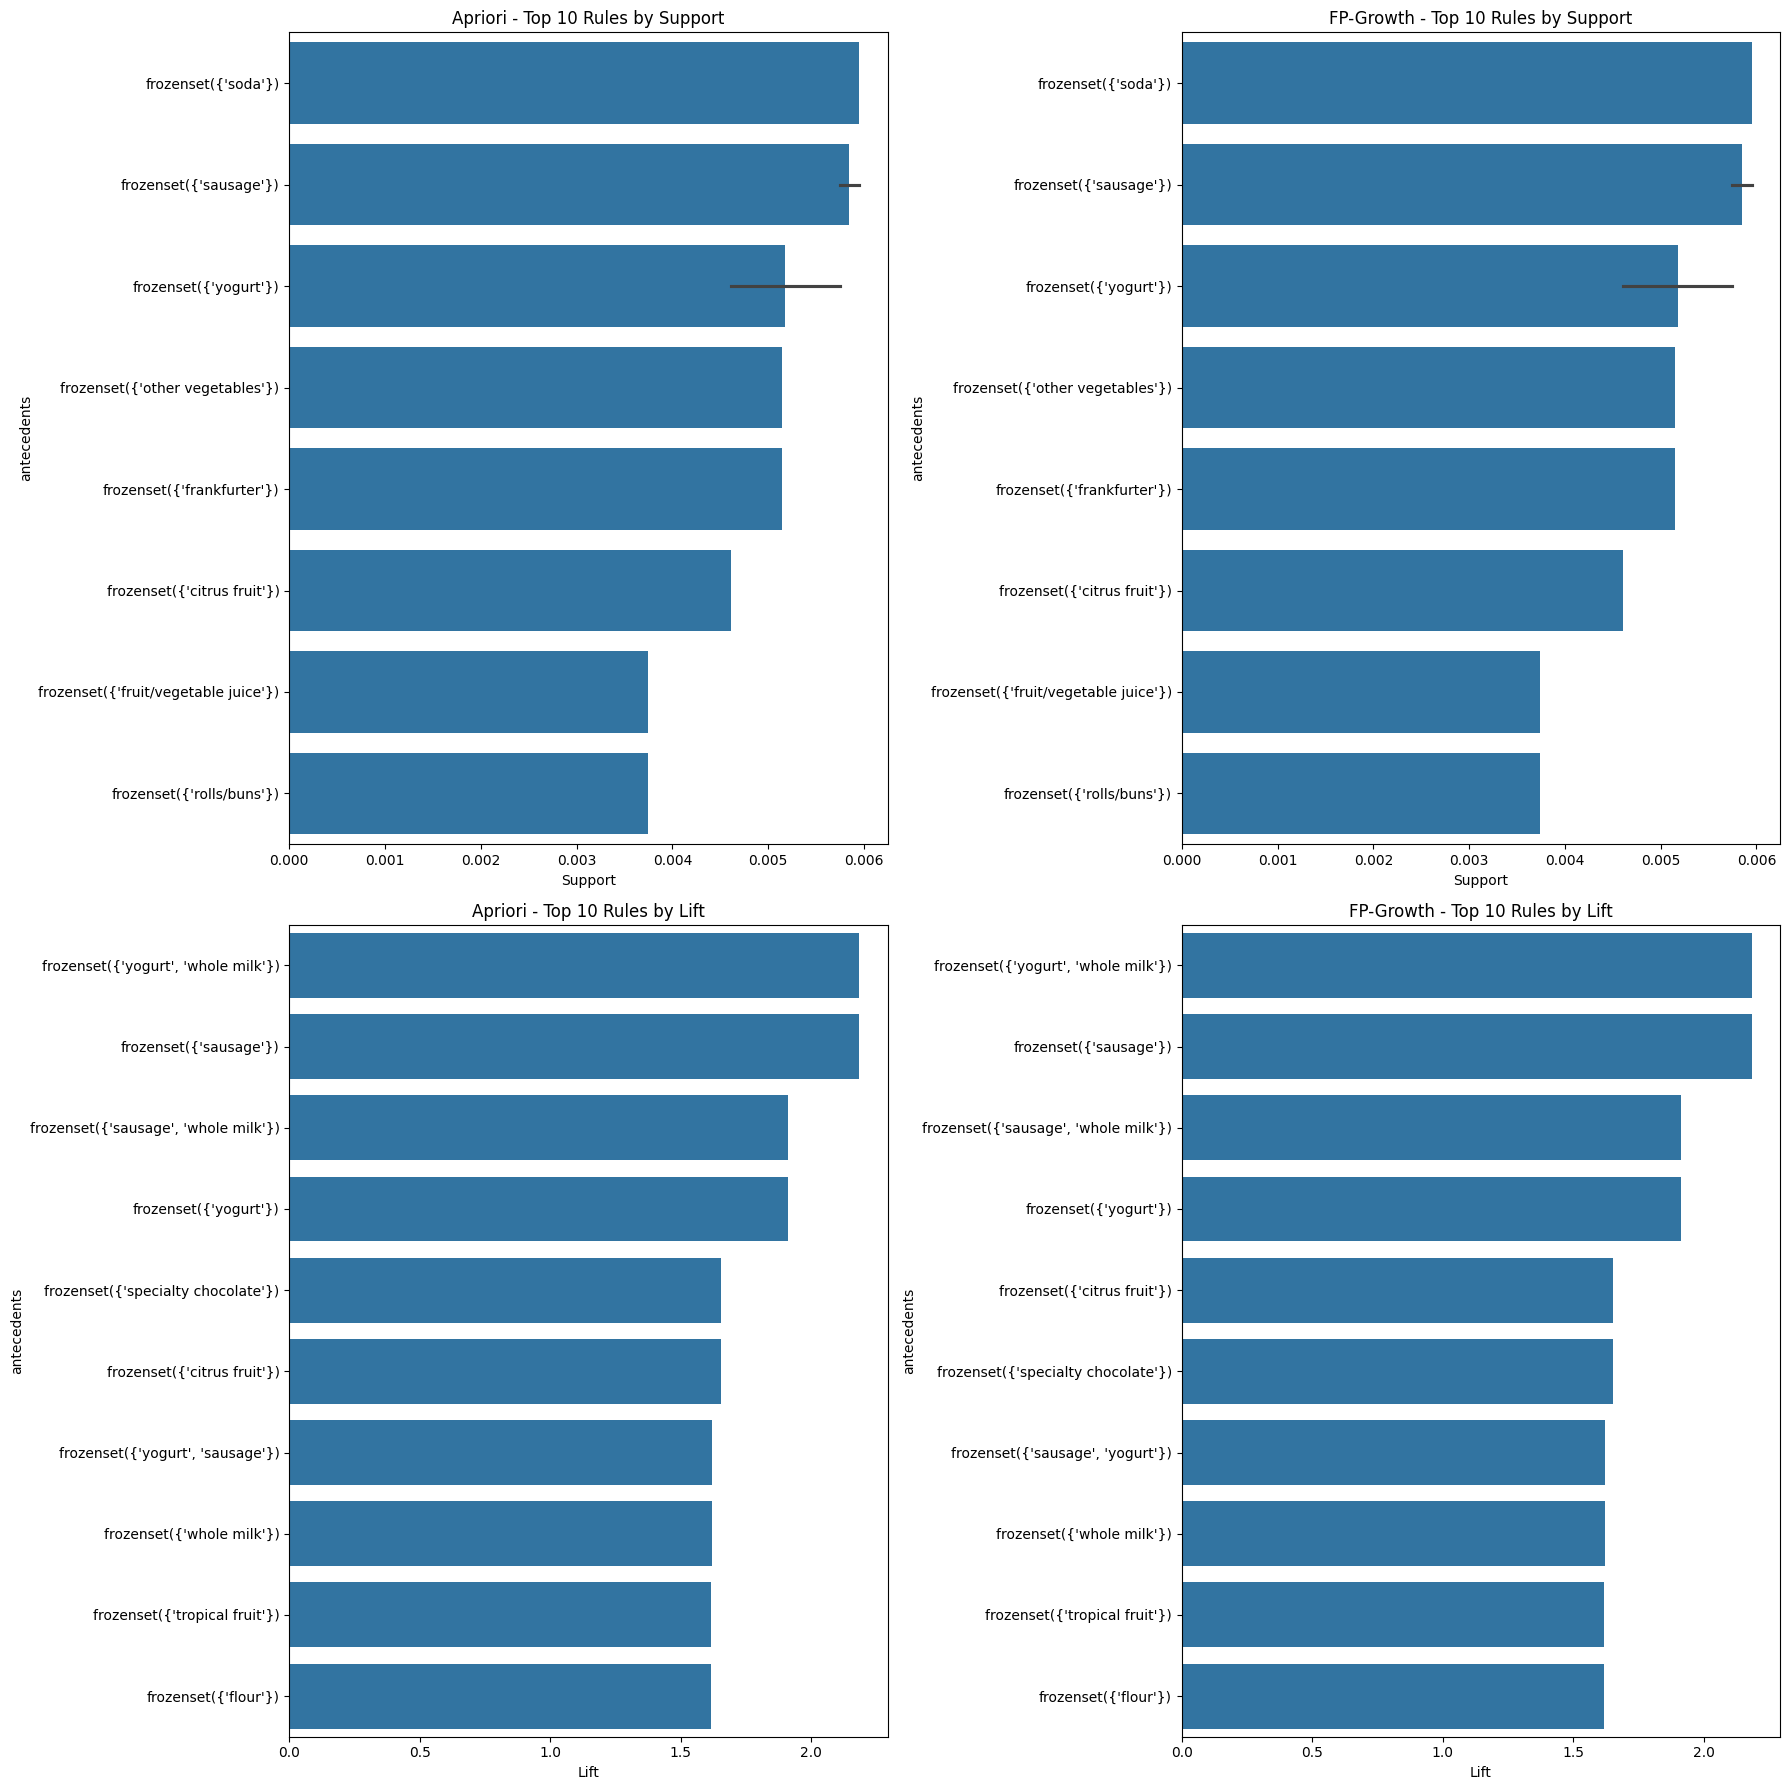

Chart saved to FP_Growth_Chart.png


In [23]:
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Support Comparison
sns.barplot(data=rules_apriori.sort_values(by="support", ascending=False).head(10), x="support", y="antecedents", ax=axes[0, 0])
axes[0, 0].set_title("Apriori - Top 10 Rules by Support")
axes[0, 0].set_xlabel("Support")

sns.barplot(data=rules_fpgrowth.sort_values(by="support", ascending=False).head(10), x="support", y="antecedents", ax=axes[0, 1])
axes[0, 1].set_title("FP-Growth - Top 10 Rules by Support")
axes[0, 1].set_xlabel("Support")

# Lift Comparison
sns.barplot(data=rules_apriori.sort_values(by="lift", ascending=False).head(10), x="lift", y="antecedents", ax=axes[1, 0])
axes[1, 0].set_title("Apriori - Top 10 Rules by Lift")
axes[1, 0].set_xlabel("Lift")

sns.barplot(data=rules_fpgrowth.sort_values(by="lift", ascending=False).head(10), x="lift", y="antecedents", ax=axes[1, 1])
axes[1, 1].set_title("FP-Growth - Top 10 Rules by Lift")
axes[1, 1].set_xlabel("Lift")

plt.tight_layout()
chart_path = "FP_Growth_Chart.png"
plt.savefig(chart_path)
plt.show()

print(f"Chart saved to {chart_path}")